# Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd     
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("latimes-county-totals.csv")

In [3]:
df.head()

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
0,2020-01-26,Alameda,1,0,0,NaN,NaN
1,2020-01-31,Alameda,1,0,0,0.0,0.0
2,2020-02-02,Alameda,1,0,0,0.0,0.0
3,2020-02-20,Alameda,1,0,0,0.0,0.0
4,2020-02-21,Alameda,1,0,0,0.0,0.0


In [4]:
df.describe()

,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
count,2485.000000,2485.000000,2485.000000,2432.000000,2432.000000
mean,59.756539,229.698189,6.879276,15.485197,0.591283
std,32.786933,974.019813,37.795395,70.478349,3.502466
min,1.000000,0.000000,0.000000,-2.000000,0.000000
25%,31.000000,2.000000,0.000000,0.000000,0.000000
50%,65.000000,14.000000,0.000000,1.000000,0.000000
75%,85.000000,101.000000,2.000000,7.000000,0.000000
max,115.000000,16449.000000,732.000000,1474.000000,76.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 7 columns):
date                   2485 non-null object
county                 2485 non-null object
fips                   2485 non-null int64
confirmed_cases        2485 non-null int64
deaths                 2485 non-null int64
new_confirmed_cases    2432 non-null float64
new_deaths             2432 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 136.0+ KB


In [6]:
df2 = df.copy(deep=True)
df_la = df2[df2['county'] == 'Los Angeles']
df_la.head()

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
657,2020-01-26,Los Angeles,37,1,0,NaN,NaN
658,2020-01-27,Los Angeles,37,1,0,0.0,0.0
659,2020-01-28,Los Angeles,37,1,0,0.0,0.0
660,2020-01-29,Los Angeles,37,1,0,0.0,0.0
661,2020-01-30,Los Angeles,37,1,0,0.0,0.0


In [7]:
df_la = df_la.drop(labels=['fips'], axis=1)
print (df_la.info())
df_la.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 657 to 744
Data columns (total 6 columns):
date                   88 non-null object
county                 88 non-null object
confirmed_cases        88 non-null int64
deaths                 88 non-null int64
new_confirmed_cases    87 non-null float64
new_deaths             87 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB
None


,confirmed_cases,deaths,new_confirmed_cases,new_deaths
count,88.000000,88.000000,87.000000,87.000000
mean,2471.238636,85.931818,189.057471,8.413793
std,4276.841374,175.960144,310.491559,15.787507
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,19.500000,0.000000,5.000000,0.000000
75%,3159.750000,57.000000,347.000000,11.000000
max,16449.000000,732.000000,1474.000000,76.000000


In [8]:
#replace the only two NAs in the first day of new_confirmed and new_deaths to 0
df_la = df_la.fillna(0)

In [9]:
print(df_la)

           date       county  confirmed_cases  deaths  new_confirmed_cases  \
657  2020-01-26  Los Angeles                1       0                  0.0   
658  2020-01-27  Los Angeles                1       0                  0.0   
659  2020-01-28  Los Angeles                1       0                  0.0   
660  2020-01-29  Los Angeles                1       0                  0.0   
661  2020-01-30  Los Angeles                1       0                  0.0   
..          ...          ...              ...     ...                  ...   
740  2020-04-18  Los Angeles            12051     577                630.0   
741  2020-04-19  Los Angeles            12349     601                298.0   
742  2020-04-20  Los Angeles            13823     619               1474.0   
743  2020-04-21  Los Angeles            15165     666               1342.0   
744  2020-04-22  Los Angeles            16449     732               1284.0   

     new_deaths  
657         0.0  
658         0.0  
659      

In [10]:
days = list(range(1,len(df_la)+1))
df_la['culm_day'] = days

In [11]:
df_la.head()

,date,county,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
657,2020-01-26,Los Angeles,1,0,0.0,0.0,1
658,2020-01-27,Los Angeles,1,0,0.0,0.0,2
659,2020-01-28,Los Angeles,1,0,0.0,0.0,3
660,2020-01-29,Los Angeles,1,0,0.0,0.0,4
661,2020-01-30,Los Angeles,1,0,0.0,0.0,5


In [12]:
df_la.columns

Index(['date', 'county', 'confirmed_cases', 'deaths', 'new_confirmed_cases',
       'new_deaths', 'culm_day'],
      dtype='object')

In [13]:
print(df_la)

           date       county  confirmed_cases  deaths  new_confirmed_cases  \
657  2020-01-26  Los Angeles                1       0                  0.0   
658  2020-01-27  Los Angeles                1       0                  0.0   
659  2020-01-28  Los Angeles                1       0                  0.0   
660  2020-01-29  Los Angeles                1       0                  0.0   
661  2020-01-30  Los Angeles                1       0                  0.0   
..          ...          ...              ...     ...                  ...   
740  2020-04-18  Los Angeles            12051     577                630.0   
741  2020-04-19  Los Angeles            12349     601                298.0   
742  2020-04-20  Los Angeles            13823     619               1474.0   
743  2020-04-21  Los Angeles            15165     666               1342.0   
744  2020-04-22  Los Angeles            16449     732               1284.0   

     new_deaths  culm_day  
657         0.0         1  
658    

In [14]:
df_la.corr(min_periods=1)

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
confirmed_cases,1.000000,0.972615,0.871687,0.922552,0.778224
deaths,0.972615,1.000000,0.820130,0.909110,0.699482
new_confirmed_cases,0.871687,0.820130,1.000000,0.769858,0.748349
new_deaths,0.922552,0.909110,0.769858,1.000000,0.715768
culm_day,0.778224,0.699482,0.748349,0.715768,1.000000


In [15]:
%matplotlib inline

In [16]:
#With all counties
#plot_df = df.dropna()
#sns.pairplot(plot_df)

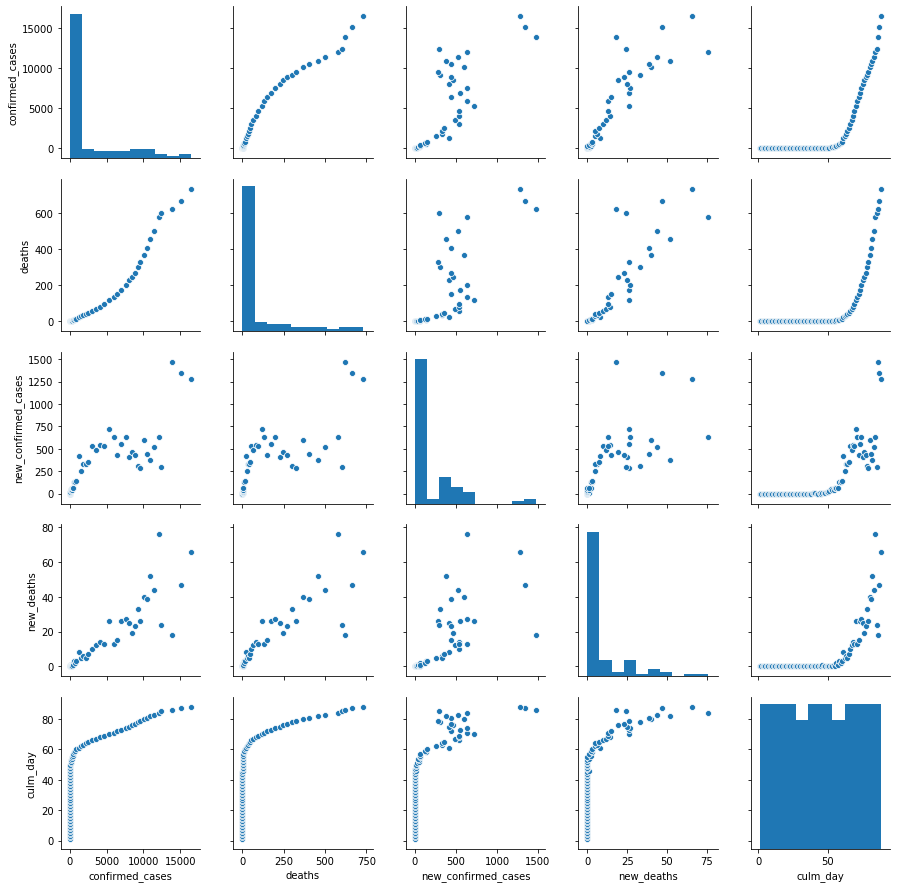

In [17]:
#only Los Angeles
plot_df_la = df_la.dropna()
sns.pairplot(plot_df_la)

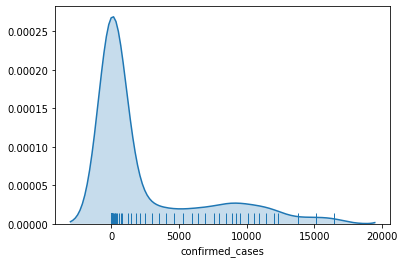

In [18]:
sns.distplot(df_la['confirmed_cases'], hist=False,rug=True, kde_kws={'shade':True})

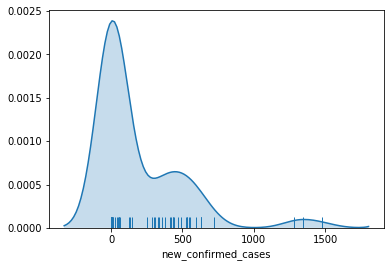

In [19]:
sns.distplot(df_la['new_confirmed_cases'], hist=False,rug=True, kde_kws={'shade':True})

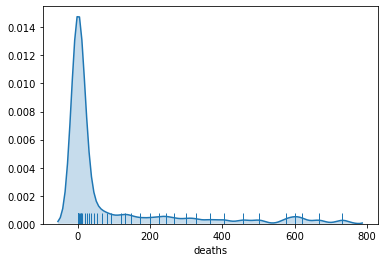

In [20]:
sns.distplot(df_la['deaths'], hist=False,rug=True, kde_kws={'shade':True})

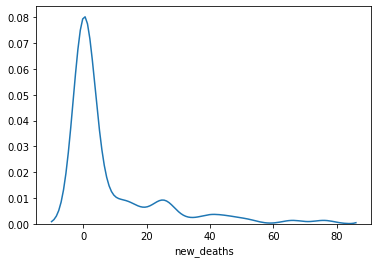

In [21]:
sns.distplot(df_la['new_deaths'], hist=False)

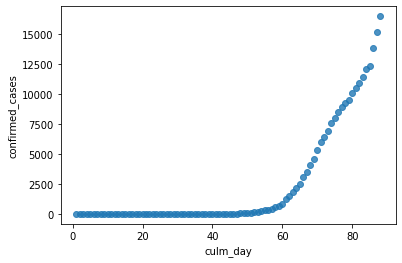

In [22]:
sns.regplot(x="culm_day", y="confirmed_cases", data=df_la,fit_reg=False)

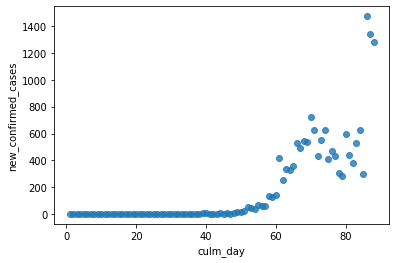

In [23]:
sns.regplot(x="culm_day", y="new_confirmed_cases", data=df_la, fit_reg=False)

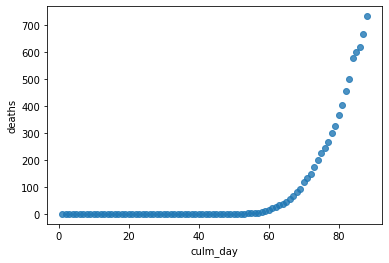

In [24]:
sns.regplot(x="culm_day", y="deaths", data=df_la,fit_reg=False)

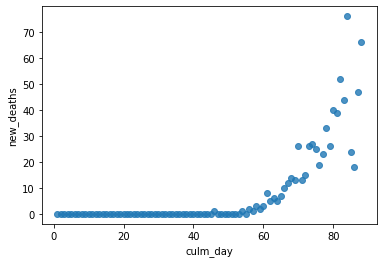

In [25]:
sns.regplot(x="culm_day", y="new_deaths", data=df_la, fit_reg=False)

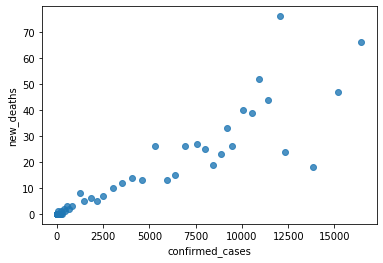

In [26]:
sns.regplot(x="confirmed_cases", y="new_deaths", data=df_la, fit_reg=False)

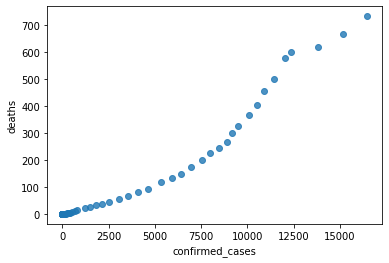

In [27]:
sns.regplot(x="confirmed_cases", y="deaths", data=df_la, fit_reg=False)

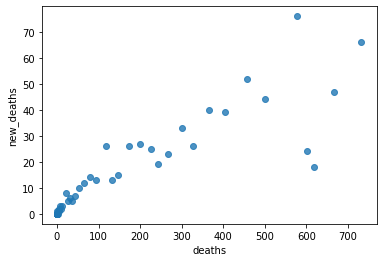

In [28]:
sns.regplot(x="deaths", y="new_deaths", data=df_la, fit_reg=False)

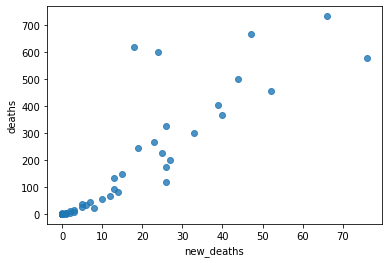

In [29]:
sns.regplot(x="new_deaths", y="deaths", data=df_la, fit_reg=False)

In [30]:
#NO NEED
#fig, ax = plt.subplots()
#grouped = plot_df.groupby('county')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='confirmed_cases', y='deaths', label=key)
#plt.show()

In [33]:
confirmed_total_date = df_la.groupby(['date']).agg({'confirmed_cases':['sum']})
fatalities_total_date = df_la.groupby(['date']).agg({'deaths':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

Text(0.5, 0, 'Date')

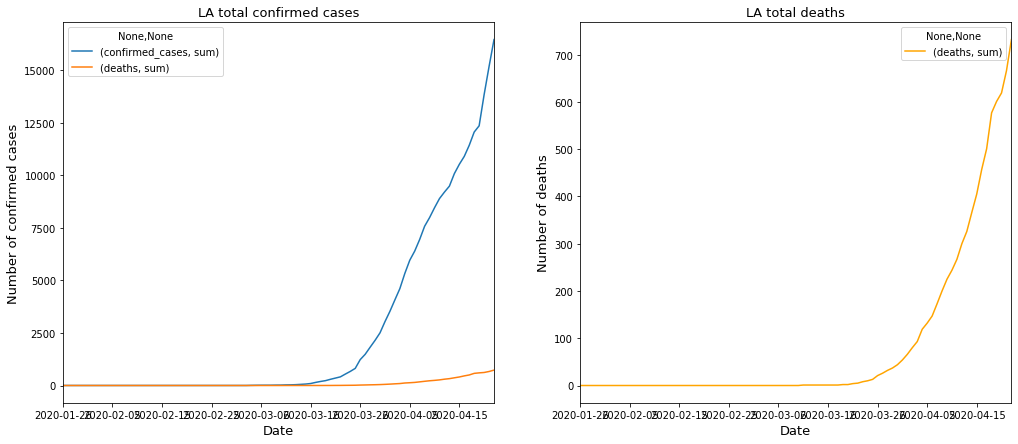

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("LA total confirmed cases", size=13)
ax1.set_ylabel("Number of confirmed cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("LA total deaths", size=13)
ax2.set_ylabel("Number of deaths", size=13)
ax2.set_xlabel("Date", size=13)

In [35]:
confirmed_total_date = df_la.groupby(['culm_day']).agg({'confirmed_cases':['sum']})
fatalities_total_date = df_la.groupby(['culm_day']).agg({'deaths':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

Text(0.5, 0, 'days')

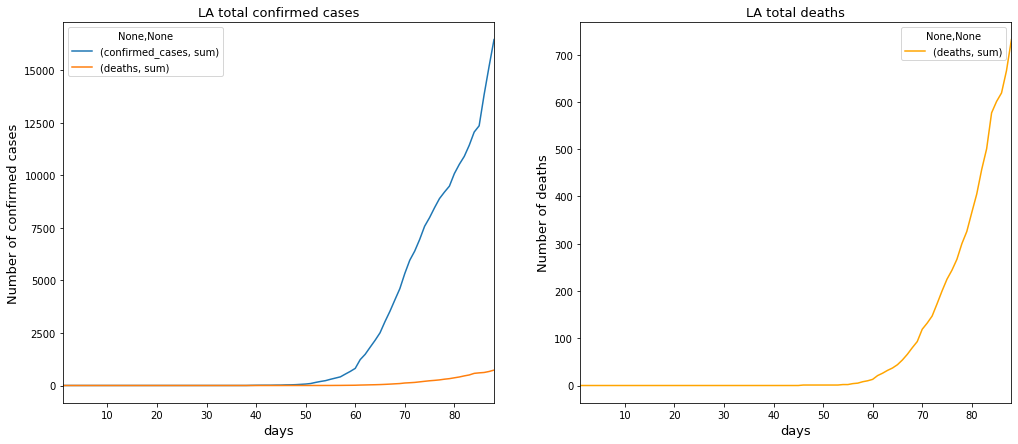

In [36]:
#same as plots above, just trying to use day to replace date for exploration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("LA total confirmed cases", size=13)
ax1.set_ylabel("Number of confirmed cases", size=13)
ax1.set_xlabel("days", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("LA total deaths", size=13)
ax2.set_ylabel("Number of deaths", size=13)
ax2.set_xlabel("days", size=13)